# house price prediction 

In [1]:
import pandas as pd
import numpy as np

In [7]:
test=pd.read_csv(r"C:\Users\vidisha\Downloads\test.csv")
train= pd.read_csv(r"C:\Users\vidisha\Downloads\train.csv")

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           68720 non-null  object 
 1   UNDER_CONSTRUCTION  68720 non-null  int64  
 2   RERA                68720 non-null  int64  
 3   BHK_NO.             68720 non-null  int64  
 4   BHK_OR_RK           68720 non-null  object 
 5   SQUARE_FT           68720 non-null  float64
 6   READY_TO_MOVE       68720 non-null  int64  
 7   RESALE              68720 non-null  int64  
 8   ADDRESS             68720 non-null  object 
 9   LONGITUDE           68720 non-null  float64
 10  LATITUDE            68720 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 5.8+ MB


In [10]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [11]:
train.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [21]:
train_X= train.drop(["POSTED_BY", "BHK_OR_RK", "ADDRESS", "TARGET(PRICE_IN_LACS)"], axis=1)
train_y= train[["TARGET(PRICE_IN_LACS)"]]
train_y["target"] = train_y[["TARGET(PRICE_IN_LACS)"]]

C:\Users\vidisha\AppData\Local\Temp\ipykernel_18632\742559002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_y["target"] = train_y[["TARGET(PRICE_IN_LACS)"]]


In [17]:
train_X

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
0,0,0,2,1300.236407,1,1,12.969910,77.597960
1,0,0,2,1275.000000,1,1,12.274538,76.644605
2,0,0,2,933.159722,1,1,12.778033,77.632191
3,0,1,2,929.921143,1,1,28.642300,77.344500
4,1,0,2,999.009247,0,1,22.592200,88.484911
...,...,...,...,...,...,...,...,...
29446,0,0,3,2500.000000,1,1,27.140626,78.043277
29447,0,0,2,769.230769,1,1,39.945409,-86.150721
29448,0,0,2,1022.641509,1,1,26.928785,75.828002
29449,0,0,2,927.079009,1,1,12.900150,80.227910


In [24]:
test_X= test.drop(["POSTED_BY", "BHK_OR_RK", "ADDRESS"], axis=1)
test_y= train_y[["target"]]

<Axes: >

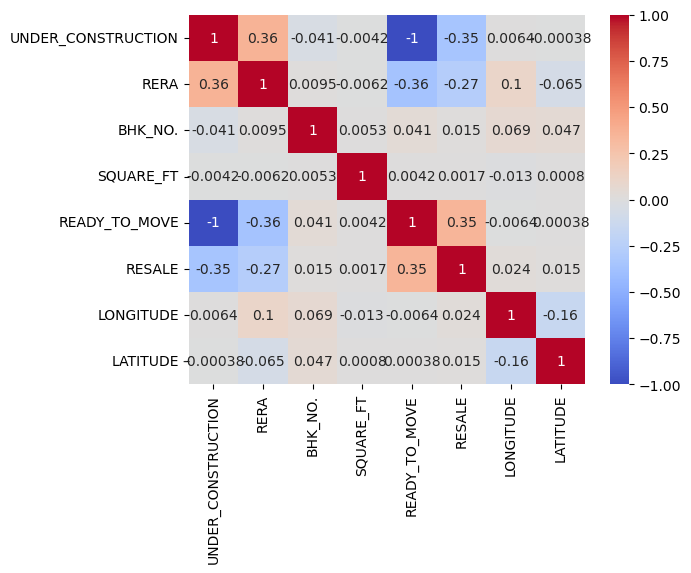

In [32]:
import seaborn as sns
sns.heatmap(train_X.corr(), cmap="coolwarm", annot=True)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model= LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

In [33]:
predict= model.predict(train_X)